<a href="https://colab.research.google.com/github/Splav12341/Data-Visualization-Methods/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import math

from sklearn.datasets import load_digits
datasets = []
for i in range(3, 10, 3):
    datasets.append(load_digits(n_class=i))

In [2]:
!pip install scikit-learn==0.24.2
from sklearn.utils.graph_shortest_path import graph_shortest_path

     |████████████████████████████████| 22.3 MB 2.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.


# isomap


In [3]:
def isomap(data, n=100):
    graph = np.zeros((data.shape[0], data.shape[0]))
    for num in range(data.shape[0]):
        difference = np.linalg.norm(data - np.tile(data[num], (data.shape[0], 1)), axis=1)
        
        ord = np.argsort(difference)
        diff = np.sort(difference)

        graph[num, ord[1:n + 1]] = diff[1:n + 1]
        graph[ord[1:n + 1], num] = diff[1:n + 1]
        graph[num, num] = 0
    
    shortest = graph_shortest_path(graph)
    for i in range(graph.shape[0]): 
        graph[i, :] = shortest[i]
    
    mean = np.mean(graph**2)
    mean_column = np.mean(graph**2, axis=0)
    mean_row = np.mean(graph**2, axis=1)
    matrix = np.zeros(graph.shape)
    gr2 = graph**2

    for shape0 in range(matrix.shape[0]):
        for shape1 in range(matrix.shape[1]):
            matrix[shape0][shape1] = -0.5 * (gr2[shape0][shape1] - mean_row[shape0] - mean_column[shape1] + mean)

    return np.dot(np.linalg.eig(matrix)[1][:, :2], np.sqrt(np.diag(np.linalg.eig(matrix)[0][:2])))

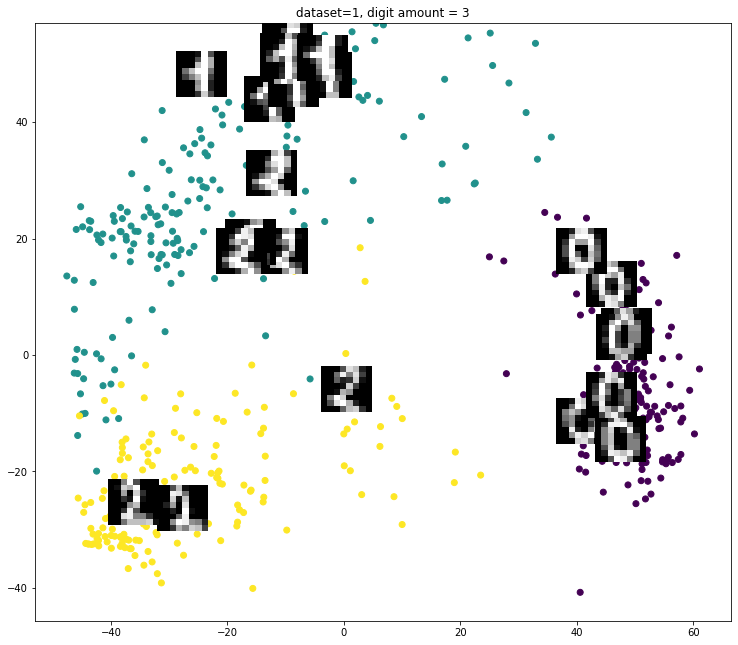

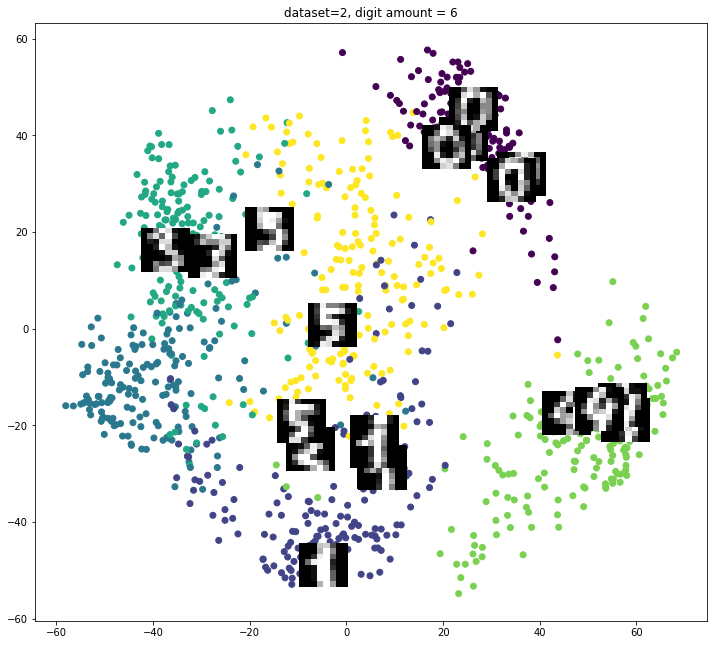

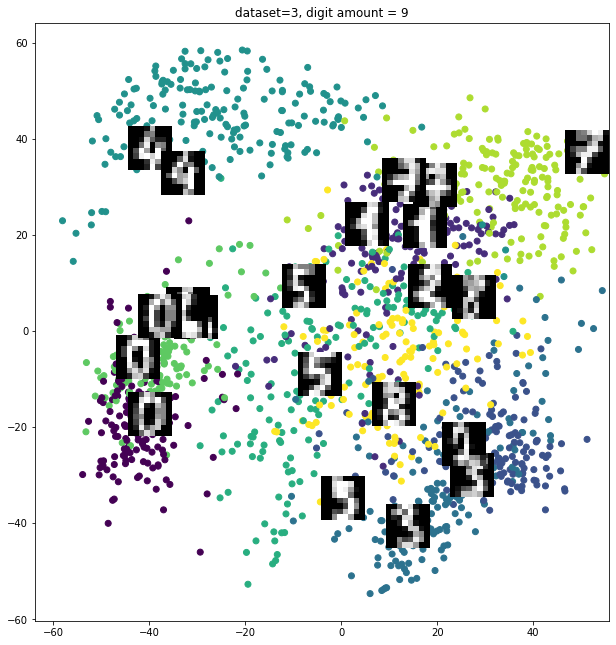

In [4]:
dataset_num = 1
digit_amount = [i for i in range(3, 10, 3)]
for data in datasets:
    XY = isomap(data.data)

    size_x = 0.04 * (max(XY[:, 0]) - min(XY[:, 0]))
    size_y = 0.04 * (max(XY[:, 1]) - min(XY[:, 1]))

    fig = plt.figure(figsize=(20,11))
    ax = fig.add_subplot(111)

    amount = 30
    for i in range(amount):
        rand_num = np.random.randint(0, amount)
        x1 = XY[rand_num, 0] - size_x
        y1 = XY[rand_num, 1] - size_y
        x2 = XY[rand_num, 0] + size_x
        y2 = XY[rand_num, 1] + size_y
        ax.imshow(data.data[rand_num, :].reshape(8, 8), cmap='gray', zorder=100, extent=(x1, x2, y1, y2))

    ax.scatter(XY[:,0], XY[:,1], c=data.target, cmap='viridis')
    ax.set_title(f"dataset={dataset_num}, digit amount = {digit_amount[dataset_num - 1]}")
    plt.show()
    dataset_num+=1